In [51]:
ls data/2015_1_austrailia/

01-Melbourne-Preview-1k-EN-1024x640.png
01-Melbourne-Race1-1k-EN-1024x640.png
01-Melbourne-Race2-1k-EN-1024x640.png
2015_1_lap_analysis.pdf
2015_1_lap_history.pdf
2015_1_qualify_best_sector_times.pdf
2015_austrailia_lap_times.csv
fia_docs/
tabula-2015_1_lap_analysis.csv
tabula-2015_1_lap_history.csv
tabula-2015_1_qualify_best_sector_times.csv


In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

/Users/milesmonaghan/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [37]:
driver_list = pd.read_csv('data/2016_drivers.csv')

In [38]:
driver_list

,NAME,DRIVER,NO
0,Daniel Ricciardo,D. RICCIARDO,3
1,Sebastian Vettel,S. VETTEL,5
2,Nico Rosberg,N. ROSBERG,6
3,Kimi Raikkonen,K. RAIKKONEN,7
4,Romain Grosjean,R. GROSJEAN,8
5,Marcus Ericsson,M. ERICSSON,9
6,Sergio Perez,S. PEREZ,11
7,Felipe Nasr,F. NASR,12
8,Fernando Alonso,F. ALONSO,14
9,Felipe Massa,F. MASSA,19


In [5]:
df = pd.read_csv('data/2016_1_austrailia/history_test.csv', header=None)
df

,0,1,2
0,5,0,1:36.916
1,7,1.514,1:38.430
2,6,2.400,1:39.316
3,33,3.158,1:40.074
4,19,4.108,1:41.024
5,44,4.373,1:41.289
6,55,5.149,1:42.065
7,27,6.518,1:43.434
8,3,6.860,1:43.776
9,14,7.631,1:44.547


In [6]:
def assign_lap(df):
    df['LAP'] = 1
    cols = ['NO', 'GAP', 'TIME', 'LAP']
    drivers = df[0].unique()
    data = df.values
    for driver in drivers:
        data[data[:,0] == driver, 3] = data[data[:,0] == driver, 3].cumsum()
    return pd.DataFrame(data=data, columns=cols)

In [7]:
df = assign_lap(df)

In [41]:
# df
df.sort_values(by=['NO', 'LAP'], inplace=True)

In [42]:
print df.info()
print df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 8 to 1014
Data columns (total 6 columns):
NO           1016 non-null object
GAP          1016 non-null object
TIME         1016 non-null datetime64[ns]
LAP          1016 non-null object
timedelta    1016 non-null timedelta64[ns]
secs         1016 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3), timedelta64[ns](1)
memory usage: 55.6+ KB
None
      NO      GAP                    TIME LAP       timedelta      secs
8      3   6.860  1900-01-01 00:01:43.776   1 00:01:43.776000   103.776
29     3   9.466  1900-01-01 00:01:34.270   2 00:01:34.270000    94.270
50     3  11.249  1900-01-01 00:01:33.950   3 00:01:33.950000    93.950
71     3  13.149  1900-01-01 00:01:33.914   4 00:01:33.914000    93.914
91     3  13.891  1900-01-01 00:01:33.015   5 00:01:33.015000    93.015
111    3  14.270  1900-01-01 00:01:32.583   6 00:01:32.583000    92.583
132    3  14.933  1900-01-01 00:01:32.743   7 00:01:32.743000    92.743

In [43]:
# df = pd.DataFrame({'Time':['1:10,10', '1:16,32', '3:03,04']})
# df['time'] = df.Time.apply(lambda x: datetime.datetime.strptime(x,'%M:%S,%f'))
# df['timedelta'] = df.time - datetime.datetime.strptime('00:00,0','%M:%S,%f')
# df['secs'] = df['timedelta'].apply(lambda x: x / np.timedelta64(1, 's'))
# print df
df['TIME'] = df['TIME'].apply(lambda x: x.strip())
df['TIME'] = df['TIME'].apply(lambda x: datetime.datetime.strptime(x,'%M:%S.%f'))
df['timedelta'] = df.TIME - datetime.datetime.strptime('00:00.0','%M:%S.%f')
df['secs'] = df['timedelta'].apply(lambda x: x / np.timedelta64(1, 's'))


AttributeError: 'Timestamp' object has no attribute 'strip'

In [44]:
df

,NO,GAP,TIME,LAP,timedelta,secs
8,3,6.860,1900-01-01 00:01:43.776,1,00:01:43.776000,103.776
29,3,9.466,1900-01-01 00:01:34.270,2,00:01:34.270000,94.270
50,3,11.249,1900-01-01 00:01:33.950,3,00:01:33.950000,93.950
71,3,13.149,1900-01-01 00:01:33.914,4,00:01:33.914000,93.914
91,3,13.891,1900-01-01 00:01:33.015,5,00:01:33.015000,93.015
111,3,14.270,1900-01-01 00:01:32.583,6,00:01:32.583000,92.583
132,3,14.933,1900-01-01 00:01:32.743,7,00:01:32.743000,92.743
152,3,15.636,1900-01-01 00:01:32.992,8,00:01:32.992000,92.992
173,3,16.177,1900-01-01 00:01:33.119,9,00:01:33.119000,93.119
193,3,16.461,1900-01-01 00:01:32.855,10,00:01:32.855000,92.855


In [45]:
ric = df[['LAP', 'secs']][df['NO'] == 3]

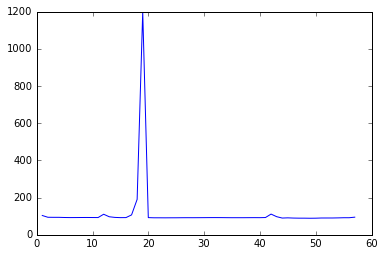

In [46]:
plt.plot(ric['LAP'], ric['secs'])

In [47]:
tires = pd.read_csv('data/2016_1_austrailia/2016_1_tires.csv')

In [48]:
tires = tires.values

In [49]:
def get_strategies(arr):
    all_strategies = []
    for row in arr:
        strategy = [row[0]]
        for item in row[1:]:
            try:
                tire, laps = item.split()
                laps = int(laps.replace('(', '').replace(')', ''))
                stint = []
                for i in xrange(laps):
                    stint.append(tire)
                strategy.extend(stint)
            except:
                pass
        all_strategies.append(strategy)
    df = pd.DataFrame(data=all_strategies)
    column_names = ['NAME']
    column_names.extend([i for i in xrange(1, df.shape[1])])
    df.columns = column_names
    merged = pd.merge(driver_list, df, on='NAME')
    return merged.drop(['NAME', 'DRIVER'], axis=1)

In [50]:
tire_strat = get_strategies(tires)
tire_strat

,NO,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,3,Super,Super,Super,Super,Super,Super,Super,Super,Super,...,Super,Super,Super,Super,Super,Super,Super,Super,Super,Super
1,5,Super,Super,Super,Super,Super,Super,Super,Super,Super,...,Soft,Soft,Soft,Soft,Soft,Soft,Soft,Soft,Soft,Soft
2,6,Super,Super,Super,Super,Super,Super,Super,Super,Super,...,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
3,7,Super,Super,Super,Super,Super,Super,Super,Super,Super,...,None,None,None,None,None,None,None,None,None,None
4,8,Soft,Soft,Soft,Soft,Soft,Soft,Soft,Soft,Soft,...,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
5,9,Super,Super,Super,Super,Super,Super,Super,Super,Super,...,None,None,None,None,None,None,None,None,None,None
6,11,Soft,Soft,Soft,Soft,Soft,Soft,Soft,Soft,Soft,...,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
7,12,Super,Super,Super,Super,Super,Super,Super,Super,Super,...,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,None
8,14,Super,Super,Super,Super,Super,Super,Super,Super,Super,...,None,None,None,None,None,None,None,None,None,None
9,19,Super,Super,Super,Super,Super,Super,Super,Super,Super,...,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium


In [ ]:
column_names = ['NAME']
column_names.extend([i for i in xrange(1, tire_strat.shape[1])])
tire_strat.columns = column_names
tire_strat

In [ ]:
merged = pd.merge(driver_list, tire_strat, on='NAME')

In [ ]:
merged.head()

In [ ]:
driver_list